In [16]:
from pyspark.sql import SparkSession
import pandas as pd

In [17]:
spark = SparkSession \
        .builder \
        .master('spark://10.10.28.172:7077') \
        .appName('visualizing') \
        .enableHiveSupport() \
        .getOrCreate()

# Preventing errors of having too many settings in hive-site.xml
spark.sparkContext.setLogLevel('OFF')
# name of database
spark.sql('use twitter_data')
spark.sql('show databases').show()

+------------+
|   namespace|
+------------+
|     default|
|twitter_data|
+------------+



In [21]:
query = "SELECT created_at, wordlist2477_sentiment FROM results WHERE created_at BETWEEN '2012-01-01 00:00:00' AND '2015-01-01 00:00:00'"
df = spark.sql(query)

<AxesSubplot:xlabel='created_at'>

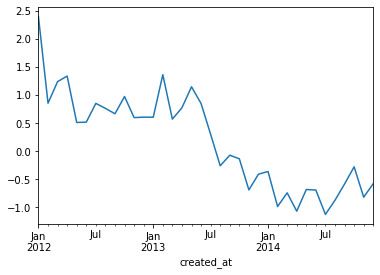

In [22]:
grouped = df.toPandas().groupby(pd.Grouper(key='created_at', freq='1M'))['wordlist2477_sentiment'].mean()
grouped.plot(kind='line',x='created_at',y='wordlist2477_sentiment')